In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import padasip as pa

Generando una señal

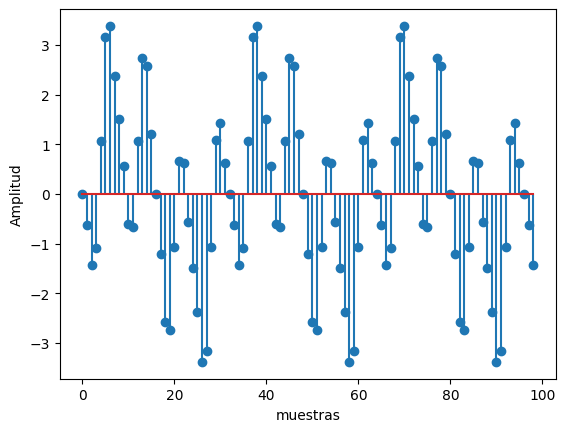

In [2]:
N = 10000
n = np.arange(0,N)
xn = 0.5 * np.sin(2.0*np.pi*1.0/4.0*n) - 2.0 * np.sin(2.0*np.pi*1.0/8.0*n) + 1.5 * np.sin(2.0*np.pi*1.0/32.0*n)
plt.figure(1)
plt.stem(n[0:99],xn[0:99])
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Adicionando ruido a la señal sintética

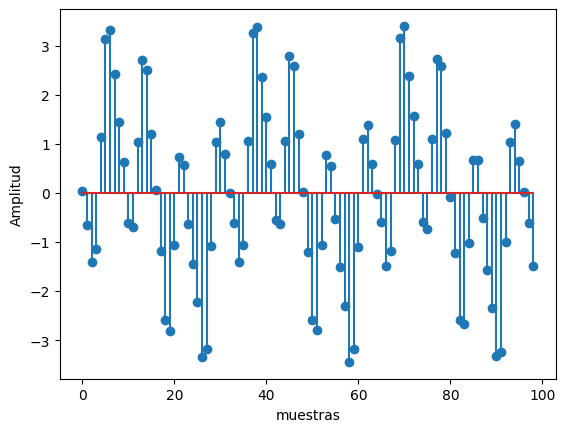

In [3]:
fact_ruido = 0.05
xnr = xn + fact_ruido*np.random.normal(0,1,N)
plt.figure(2)
plt.stem(n[0:99],xnr[0:99])
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Filtro adaptativo usando padasip

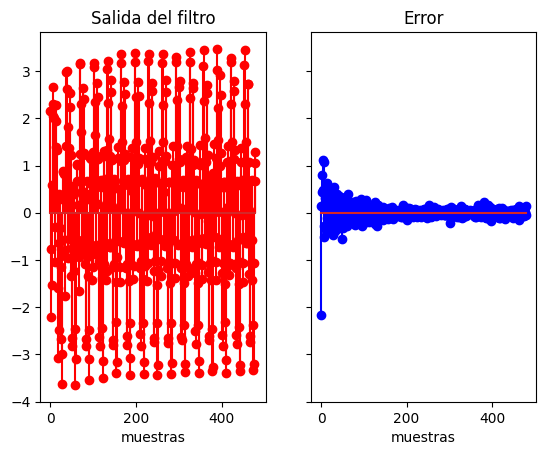

In [40]:
ord = 20
pas = 0.01
# log
err = np.zeros(N-ord)
yn = np.zeros(N-ord) 
# filtro
flt = pa.filters.FilterLMS(n=ord, mu=pas)
for i in range(0,N-ord):
    flt.adapt(xn[i], xnr[i:i+ord])
    yn[i] = flt.predict(xnr[i:i+ord])
    err[i] = xn[i] - yn[i]

# Parte real e imaginaria
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('Salida del filtro')
ax1.stem(yn,linefmt='red')
ax1.set_xlabel('muestras')
ax2.set_title('Error')
ax2.stem(err,linefmt='blue')
ax2.set_xlabel('muestras')

y = signal.lfilter(flt.w, 1, xnr)
